# Analyse des bandes électroniques du cristal Sr2SnHg

### Imports:

In [49]:
from numpy import *
import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure import *
from tabulate import tabulate 

### Téléchargement du fichier :

In [50]:
with MPRester("QpuaQDTCSV1bdImr") as m:

    # Structure for material id
    bandStructure =  m.get_bandstructure_by_material_id("mp-867169")

### Visualisation de la zone de Brillouin :

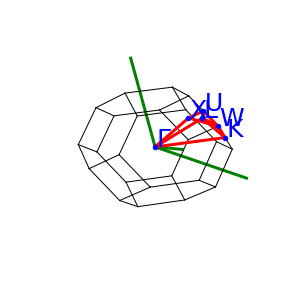

In [51]:
bsPlotter = plotter.BSPlotter(bandStructure)
bsPlotter.plot_brillouin()

### Visualisation de la bande interdite :


----------  ---------------------------------------
direct      False
energy      0.26700000000000035 eV
transition  (0.353,0.353,0.353)-(0.186,0.000,0.186)


<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

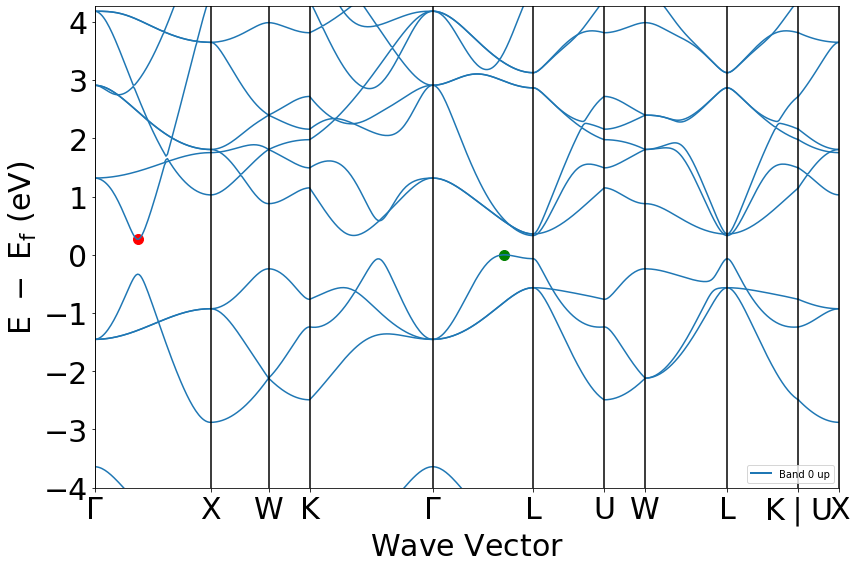

In [52]:
bandGap = bandStructure.get_band_gap()
keys = []
for i in bandGap.keys() : 
    keys.append(i)
print(tabulate([[keys[0] ,str(bandGap.get('direct'))],
	            [keys[1] ,str(bandGap.get('energy'))+" eV"],
	            [keys[2] ,str(bandGap.get('transition'))]],
	            headers=["",""]))
bsPlotter.get_plot(vbm_cbm_marker=True)

### Analyse de la première bande de conduction :

In [53]:
cbm = bandStructure.get_cbm()
data = bsPlotter.bs_plot_data()
eFermi = data.get('zero_energy')

print(tabulate([["Bande qui contient le CBM: ",str(cbm.get('band_index'))],
	            ["Énergie du CBM: ",str(cbm.get('energy'))+" eV"],
	            ["Sur le graphe E-Efermi: ",str(cbm.get('energy')-eFermi)+" eV)"]],
	            headers=["",""]))


--------------------------  -------------------------------------------------
Bande qui contient le CBM:  defaultdict(<class 'list'>, {<Spin.up: 1>: [23]})
Énergie du CBM:             3.7568 eV
Sur le graphe E-Efermi:     0.26700000000000035 eV)


### Analyse de la dernière bande de valence :

In [54]:
vbm = bandStructure.get_vbm()

print(tabulate([["Bande qui contient le VBM: ",str(vbm.get('band_index'))],
	            ["Énergie du VBM: ",str(vbm.get('energy'))+" eV"],
	            ["Sur le graphe E-Efermi: ",str(vbm.get('energy')-eFermi)+" eV)"]],
	            headers=["",""]))


--------------------------  -------------------------------------------------
Bande qui contient le VBM:  defaultdict(<class 'list'>, {<Spin.up: 1>: [22]})
Énergie du VBM:             3.4898 eV
Sur le graphe E-Efermi:     0.0 eV)


### Analyse de la dispersion :

In [55]:
#Récupération des données
distancesData = data.get('distances')
energyData = data.get('energy')

 
#pour chaque intervalle entre 2 kpoints on renvoit: [pente,x0,y0,dx,dy]
def slopeInfo(x,y):
	return array([abs((y[-1]-y[0])/(x[-1]-x[0])),x[0],y[0],x[-1]-x[0],y[-1]-y[0]])


#retourne un tableau qui contient toutes les infos des pentes entre chaque intervalle pour une bande
#ainsi que l'indice de la pente minimale et maximale  
def getDispersion(y):
    slopes = zeros((len(distancesData),5))
    for i in range(len(slopes)):
        slopes[i] = slopeInfo(distancesData[i],energyData.get('1')[i][y])
    tab = (slopes.T)
    return (tab,argmax(tab[0]),argmin(tab[0]))

(cbTab,maxCb,minCb) = getDispersion(23)
(vbTab,maxVb,minVb) = getDispersion(22)

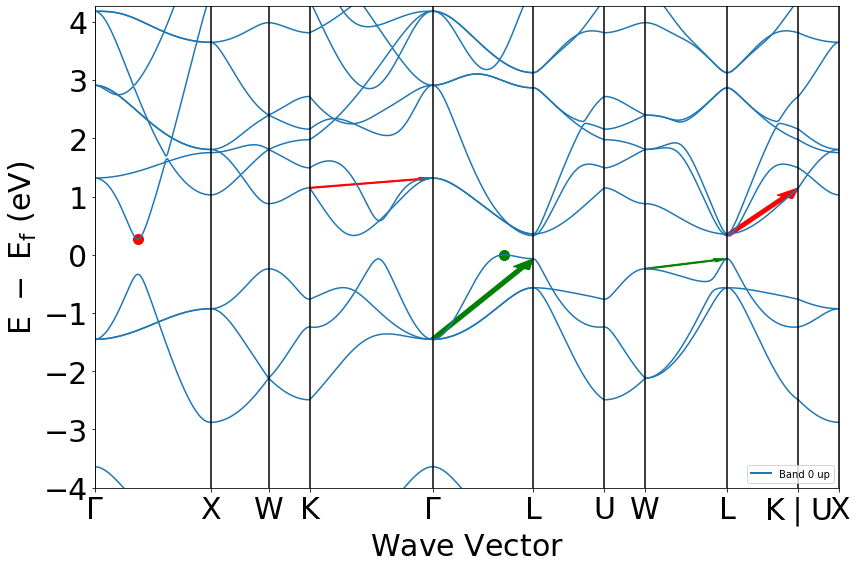

In [59]:
bsPlotter.get_plot(vbm_cbm_marker=True)
plt.arrow(cbTab[1,maxCb],cbTab[2,maxCb],cbTab[3,maxCb],cbTab[4,maxCb],color='red',width=0.04,length_includes_head=True)
plt.arrow(cbTab[1,minCb],cbTab[2,minCb],cbTab[3,minCb],cbTab[4,minCb],color='red',width=0.02,length_includes_head=True)
plt.arrow(vbTab[1,maxVb],vbTab[2,maxVb],vbTab[3,maxVb],vbTab[4,maxVb],color='green',width=0.04,length_includes_head=True)
plt.arrow(vbTab[1,minVb],vbTab[2,minVb],vbTab[3,minVb],vbTab[4,minVb],color='green',width=0.02,length_includes_head=True)

### Détermination de la masse effective

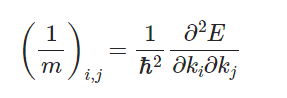

In [69]:
hBar = (6.62607004*10**(-34))/(2*pi)

kPointVbm = vbm['kpoint'].cart_coords
kPointCbm = cbm['kpoint'].cart_coords

massVbm = (hBar**2 * (kPointVbm[0]**2+kPointVbm[1]**2+kPointVbm[2]**2))/(2*abs(vbm['energy']))
print('La masse effective au sommet de la dernière bande de valence = ',massVbm,'kg')

massCbm = (hBar**2 * (kPointCbm[0]**2+kPointCbm[1]**2+kPointCbm[2]**2))/(2*abs(cbm['energy']))
print('La masse effective à la base de la première bande de conduction = ',massCbm,'kg')

La masse effective au sommet de la dernière bande de valence =  3.581498435853924e-70 kg
La masse effective à la base de la première bande de conduction =  1.2306317542078716e-70 kg
